### Imported Libraries + Dataset Extration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, roc_auc_score
from scipy import stats
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, mutual_info_classif

In [2]:
data = pd.read_csv("mushrooms.csv")

In [3]:
# Display first 5 rows
print(data.head())

# ✅ Display number of rows and columns
print("\nNumber of rows and columns:")
print(data.shape)  # (rows, columns)

# ✅ Display column names
print("\nColumn names:")
print(data.columns.tolist())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [4]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### EDA

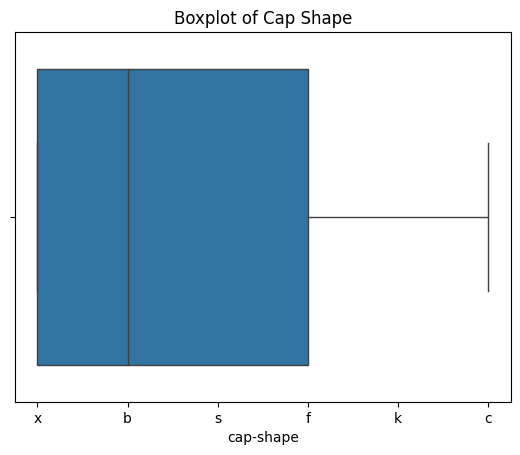

In [5]:
sns.boxplot(x=data['cap-shape'])
plt.title("Boxplot of Cap Shape")
plt.show()

In [6]:
z_scores = np.abs(zscore(data.select_dtypes(include=['int64', 'float64'])))
outliers = (z_scores > 3)

# Display outliers in any column
data_outliers = data[(outliers).any(axis=1)]
print(data_outliers.head())

Empty DataFrame
Columns: [class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 23 columns]


### Removing Outliers using Z-SCORE

In [7]:
z_scores = np.abs(zscore(data.select_dtypes(include=['int64', 'float64'])))

threshold = 3

In [8]:
# Keep only the rows where all z-scores are below the threshold
data_clean = data[(z_scores < threshold).all(axis=1)]

In [9]:
print("Original dataset shape:", data.shape)
print("Dataset shape after outlier removal:", data_clean.shape)

Original dataset shape: (8124, 23)
Dataset shape after outlier removal: (8124, 23)


###  Train-Test Split and Model training

In [10]:
label_encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [11]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Step 3: Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
y_pred = svm_model.predict(X_test)

In [15]:
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

In [16]:
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training accuracy: 0.9898
Test accuracy: 0.9926
Confusion Matrix:
 [[842   1]
 [ 11 771]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



### To improve Accuracy

In [17]:
# Split data
X = data.drop('class', axis=1)
y = data['class']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)


In [18]:
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

In [19]:
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training accuracy: 1.0000
Test accuracy: 1.0000
Confusion Matrix:
 [[843   0]
 [  0 782]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Feature Selection - K-Best method using ANOVA

In [20]:
# Remove constant (zero variance) features
var_thresh = VarianceThreshold(threshold=0)
X_reduced = var_thresh.fit_transform(X)

# Keep only non-constant feature columns
cols_kept = X.columns[var_thresh.get_support()]
X = pd.DataFrame(X_reduced, columns=cols_kept)

In [21]:
# Select top K features (e.g., 7)
k = 7
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

In [22]:
# If you want the column names of the selected features:
selected_mask = selector.get_support()  # Boolean mask
selected_features = X.columns[selected_mask]

print("Selected Features:", list(selected_features))

Selected Features: ['bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'ring-type']


In [23]:
# Use only selected columns from the original X
X_selected = X[selected_features]

# Scale and split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score
y_pred = svm_model.predict(X_test)

train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training accuracy: 0.9749
Test accuracy: 0.9772
Confusion Matrix:
 [[843   0]
 [ 37 745]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       843
           1       1.00      0.95      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [24]:
for k in range(4, X.shape[1] + 1):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]

    X_scaled = StandardScaler().fit_transform(X[selected_features])
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = SVC(kernel='rbf', class_weight='balanced')
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))

    print(f"K={k} → Accuracy: {acc:.2f}")

K=4 → Accuracy: 0.92
K=5 → Accuracy: 0.97
K=6 → Accuracy: 0.97
K=7 → Accuracy: 0.98
K=8 → Accuracy: 0.99
K=9 → Accuracy: 0.98
K=10 → Accuracy: 0.99
K=11 → Accuracy: 1.00
K=12 → Accuracy: 1.00
K=13 → Accuracy: 1.00
K=14 → Accuracy: 1.00
K=15 → Accuracy: 1.00
K=16 → Accuracy: 1.00
K=17 → Accuracy: 1.00
K=18 → Accuracy: 1.00
K=19 → Accuracy: 1.00
K=20 → Accuracy: 1.00
K=21 → Accuracy: 1.00


### Feature Selection-K BEST METHOD USING INFORMATION GAIN

In [25]:
k = 7  # or any number of features you want
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X, y)

In [26]:
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

print("Top", k, "features based on Information Gain:", list(selected_features))

Top 7 features based on Information Gain: ['odor', 'gill-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'ring-type', 'spore-print-color']


In [27]:
X_selected = X[selected_features]

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [31]:
y_pred = svm_model.predict(X_test)

In [32]:
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training accuracy: 0.9749
Test accuracy: 0.9772
Confusion Matrix:
 [[843   0]
 [ 39 743]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       843
           1       1.00      0.95      0.97       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



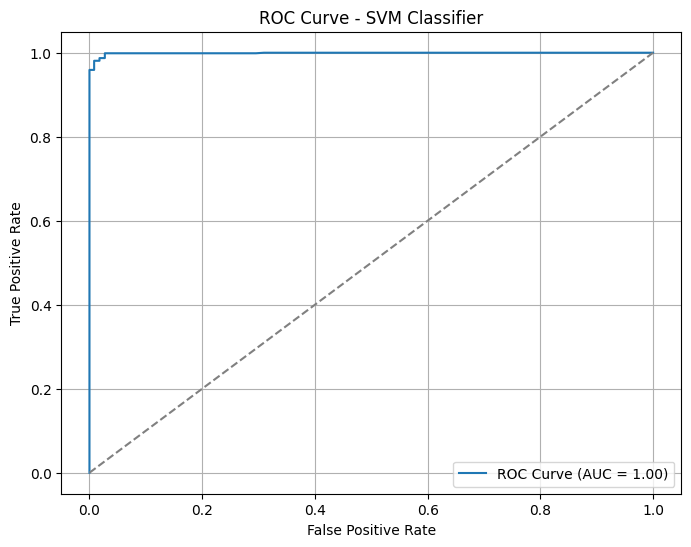

In [33]:
# Make sure your model was trained with probability=True
# Get predicted probabilities for the positive class (1)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# (Optional) Use selected features if you've done feature selection
X_selected = X[selected_features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Define model
svm_model = SVC(kernel='rbf', class_weight='balanced')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5, scoring='accuracy')

# Show results
print("Cross-Validation Accuracies:", cv_scores)
print("Average Accuracy:", cv_scores.mean())


Cross-Validation Accuracies: [0.75630769 0.99138462 0.91507692 1.         0.59421182]
Average Accuracy: 0.851396210685866
